
**importing the necessary Python libraries and the dataset**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

In [ ]:
path='/content/drive/MyDrive/HocTap/Kì 2 Năm 3/Học máy/Final_Exam//'
os.chdir(path)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Image
import warnings
warnings.filterwarnings("ignore")

In [ ]:
books = pd.read_csv('books.csv')

**Data Exploration**

In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookId              9999 non-null   int64  
 1   title               9807 non-null   object 
 2   link                9999 non-null   object 
 3   authors             9807 non-null   object 
 4   book_id             9999 non-null   int64  
 5   genres              9638 non-null   object 
 6   average_rating      9638 non-null   float64
 7   language            9562 non-null   object 
 8   num_pages           9569 non-null   float64
 9   ratings_count       9638 non-null   float64
 10  text_reviews_count  9632 non-null   float64
 11  publication_date    9638 non-null   object 
 12  publisher           9366 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 1015.6+ KB


In [ ]:
books_dfCopy=books
columns_to_exclude = ['bookId', 'book_id', 'num_pages']
books_dfCopy = books_dfCopy.drop(columns=columns_to_exclude)
books_dfCopy.describe()

,average_rating,ratings_count,text_reviews_count
count,9638.000000,9.638000e+03,9632.000000
mean,4.055098,1.292744e+05,7906.224772
std,0.262864,3.771478e+05,19309.018464
min,2.000000,4.000000e+00,1.000000
25%,3.890000,1.377750e+04,815.000000
50%,4.070000,3.816000e+04,2309.000000
75%,4.240000,9.668950e+04,6360.500000
max,4.930000,1.006929e+07,271632.000000


In [ ]:
# Xem có bao nhiêu ngôn ngữ và số lần xuất hiện của các ngôn ngữ
language_counts = books['language'].value_counts()

# In ra kết quả
print("Số lần xuất hiện của mỗi ngôn ngữ:")
print(language_counts)

# Sử dụng describe để mô tả dữ liệu
description = language_counts.describe()
print("\nMô tả dữ liệu về số lần xuất hiện của các ngôn ngữ:")
print(description)

Số lần xuất hiện của mỗi ngôn ngữ:
language
English                                9279
Spanish; Castilian                       61
Arabic                                   53
French                                   49
German                                   28
Indonesian                               18
Italian                                   9
Japanese                                  8
Portuguese                                8
Turkish                                   8
Polish                                    7
Persian                                   6
Dutch; Flemish                            6
Bulgarian                                 3
Finnish                                   2
Chinese                                   2
Romanian                                  2
Norwegian                                 2
Urdu                                      2
Multiple languages                        2
Greek, Modern (1453-)                     1
Icelandic                       

In [ ]:
# Xem có bao nhiêu nhà xuất bản và số lần xuất hiện của các nhà xuất bản
publisher_counts = books['publisher'].value_counts()

# In ra kết quả
print("Số lần xuất hiện của mỗi các nhà xuất bản:")
print(publisher_counts)

Số lần xuất hiện của mỗi các nhà xuất bản:
publisher
Vintage                                   178
Penguin Books                             166
HarperCollins                             144
Ballantine Books                          113
HarperTeen                                108
                                         ... 
Literary Vagabond Books                     1
Gateway Editions                            1
Michael G. Kamer OMIE Aust.                 1
Strategic Book Publishing & Rights Co.      1
Teplok Press                                1
Name: count, Length: 2514, dtype: int64


In [ ]:
# Tìm và tách ra các thể loại riêng biệt để quan sát có bao nhiêu thể loại và số lần xuất hiện của thể loại
try:
  # Thay thế các giá trị NaN bằng chuỗi rỗng
  books_dfCopy['genres'] = books_dfCopy['genres'].fillna('')
  books_dfCopy['genres'] = books_dfCopy['genres'].apply(lambda x: [genre.strip() for genre in x.split(',')])
except:
  print("Đã thực hiện trước đó rồi")
# Tạo một danh sách chứa tất cả các thể loại
all_genres = []
for genres in books_dfCopy['genres']:
    all_genres.extend(genres)

# Đếm số lần xuất hiện của mỗi thể loại
genre_counts = {}
for genre in all_genres:
    if genre in genre_counts:
        genre_counts[genre] += 1
    else:
        genre_counts[genre] = 1
sorted_genre_counts = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)
# In ra số lần xuất hiện của mỗi thể loại
index=0;
print("Số lần xuất hiện của mỗi thể loại (sắp xếp giảm dần):")
for genre, count in sorted_genre_counts:
  index+=1
  print(index,genre + ":", count)

# Lấy ra các thể loại riêng biệt
unique_genres = set()
for genres in books_dfCopy['genres']:
    unique_genres.update(genres)
# print("Danh sách thể loại duy nhất:")
# print(unique_genres)
print("Số lượng thể loại:", len(unique_genres))

# Chuyển đổi từ điển thành DataFrame để sử dụng describe
genre_counts_df = pd.DataFrame(list(genre_counts.items()), columns=['Genre', 'Count'])

# Mô tả dữ liệu về số lần xuất hiện của các thể loại
description = genre_counts_df['Count'].describe()
print("Mô tả dữ liệu về số lần xuất hiện của các thể loại:")
print(description)


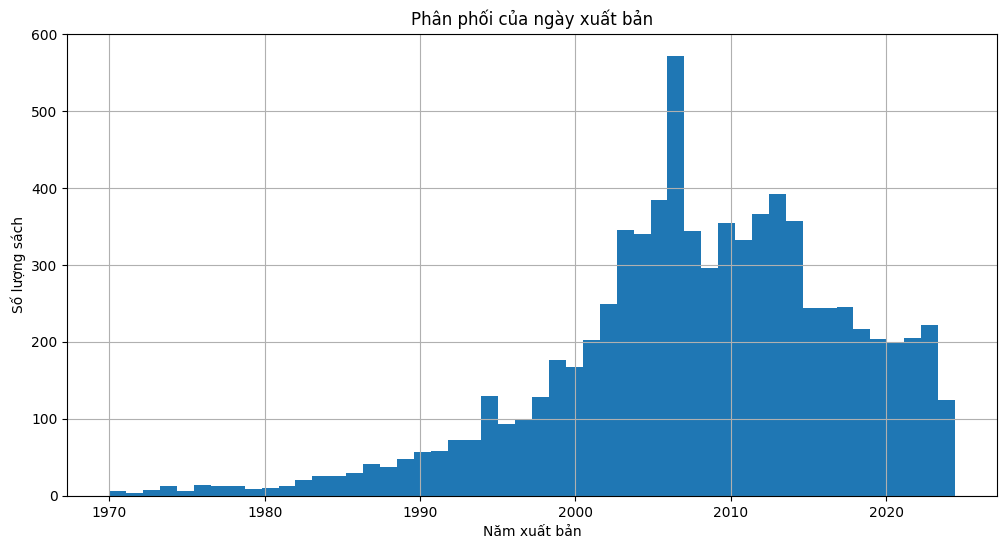

Số lượng sách được xuất bản mỗi năm:
count     55.000000
mean     142.381818
std      131.052222
min        3.000000
25%       19.000000
50%       98.000000
75%      225.000000
max      510.000000
Name: count, dtype: float64
Số lượng sách được xuất bản theo từng năm:
publication_year
1970.0      3
1971.0      4
1972.0      8
1973.0      7
1974.0     10
1975.0      7
1976.0     16
1977.0     11
1978.0     10
1979.0     10
1980.0      9
1981.0     12
1982.0     15
1983.0     22
1984.0     25
1985.0     26
1986.0     29
1987.0     39
1988.0     38
1989.0     51
1990.0     54
1991.0     49
1992.0     71
1993.0     70
1994.0     93
1995.0     95
1996.0     98
1997.0    103
1998.0    144
1999.0    166
2000.0    163
2001.0    211
2002.0    261
2003.0    307
2004.0    327
2005.0    374
2006.0    510
2007.0    335
2008.0    274
2009.0    314
2010.0    317
2011.0    328
2012.0    354
2013.0    357
2014.0    281
2015.0    209
2016.0    230
2017.0    220
2018.0    210
2019.0    196
2020.0    183
2

In [ ]:
# Chuyển đổi cột 'publication_date' thành kiểu datetime
books_dfCopy['publication_date'] = pd.to_datetime(books_dfCopy['publication_date'], errors='coerce')
# Xem phân phối của publication_date
plt.figure(figsize=(12, 6))
books_dfCopy['publication_date'].hist(bins=50)
plt.title('Phân phối của ngày xuất bản')
plt.xlabel('Năm xuất bản')
plt.ylabel('Số lượng sách')
plt.show()

# Tính số lượng sách được xuất bản mỗi năm
books_dfCopy['publication_year'] = books_dfCopy['publication_date'].dt.year
yearly_publication = books_dfCopy['publication_year'].value_counts().sort_index()

# Phân tích thống kê xu hướng xuất bản
print("Số lượng sách được xuất bản mỗi năm:")
print(yearly_publication.describe())

# Xem chi tiết số lượng sách theo từng năm
print("Số lượng sách được xuất bản theo từng năm:")
print(yearly_publication)


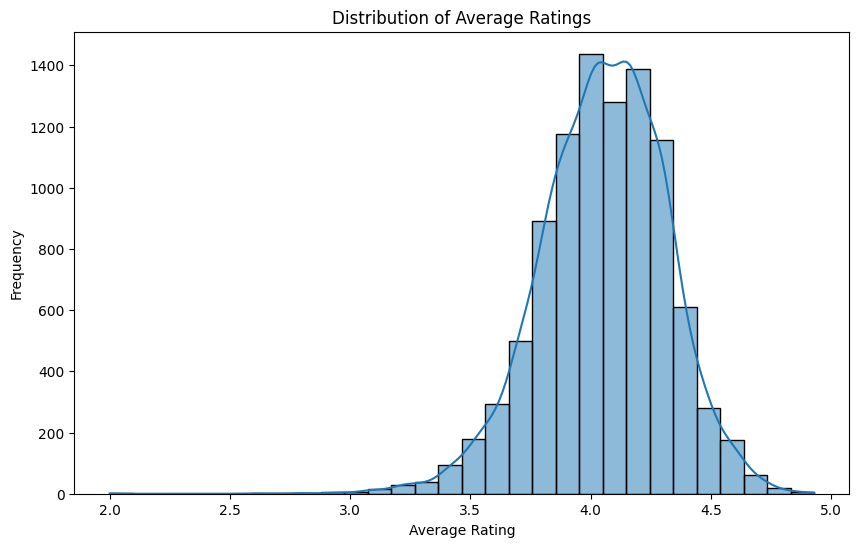

In [ ]:
# Histogram cho 'average_rating'
plt.figure(figsize=(10, 6))
sns.histplot(books['average_rating'], bins=30, kde=True)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

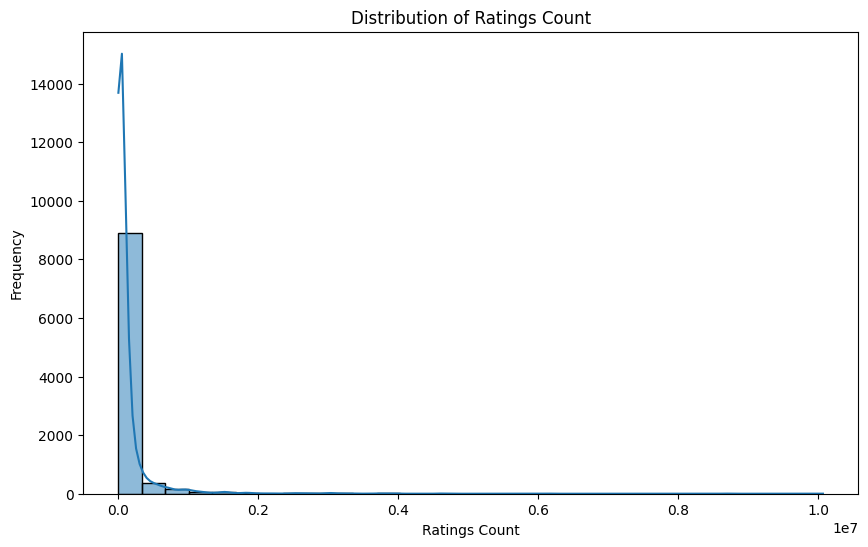

In [ ]:
# Histogram cho 'ratings_count'
plt.figure(figsize=(10, 6))
sns.histplot(books['ratings_count'], bins=30, kde=True)
plt.title('Distribution of Ratings Count')
plt.xlabel('Ratings Count')
plt.ylabel('Frequency')
plt.show()


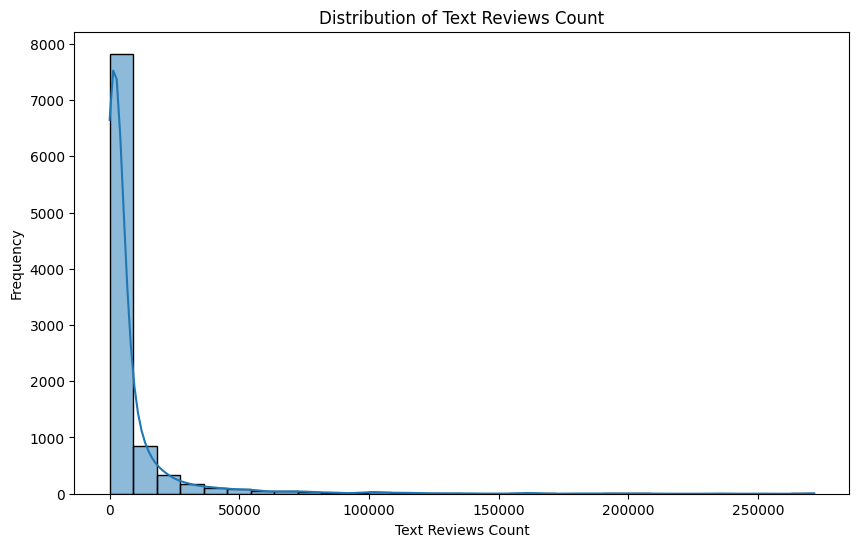

In [ ]:
# Histogram cho 'text_reviews_count'
plt.figure(figsize=(10, 6))
sns.histplot(books['text_reviews_count'], bins=30, kde=True)
plt.title('Distribution of Text Reviews Count')
plt.xlabel('Text Reviews Count')
plt.ylabel('Frequency')
plt.show()

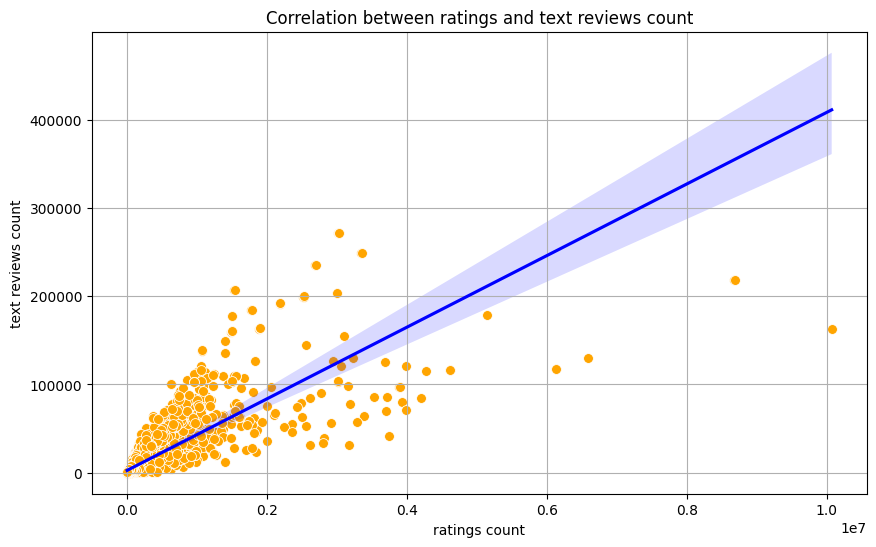

In [ ]:
# 1.rating_count và text_reviews_count
plt.figure(figsize=(10, 6))
sns.scatterplot(data=books, x='ratings_count', y='text_reviews_count', color='orange', s=50)
sns.regplot(data=books, x='ratings_count', y='text_reviews_count', scatter=False, color='blue')

plt.title('Correlation between ratings and text reviews count')
plt.xlabel('ratings count')
plt.ylabel('text reviews count')
plt.grid(True)
plt.show()


In [ ]:
# 2. rating_count và average_rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=books, x='ratings_count', y='average_rating', color='blue', s=50)
sns.regplot(data=books, x='ratings_count', y='average_rating', scatter=False, color,.='red')
plt.title('Correlation between rating count and average rating')
plt.xlabel('Rating Count')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

SyntaxError: positional argument follows keyword argument (<ipython-input-17-52e928f39259>, line 4)

In [ ]:
# 3. text_reviews_count và average_rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=books, x='text_reviews_count', y='average_rating', color='purple', s=50)
sns.regplot(data=books, x='text_reviews_count', y='average_rating', scatter=False, color='red')
plt.title('Correlation between text reviews count and average rating')
plt.xlabel('Text Reviews Count')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 8))
correlation_matrix = books[['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Ma trận hệ số tương quan giữa các thuộc tính số')
plt.show()


**Clean data**

In [ ]:
# Kiểm tra tính duy nhất của giá trị trong cột bookId
if books['bookId'].is_unique:
    print("Cột 'bookId' chứa các giá trị duy nhất.")
else:
    print("Cột 'bookId' chứa các giá trị không duy nhất. Cần loại bỏ các dòng có giá trị trùng lặp.")
    # Loại bỏ các dòng có giá trị trùng lặp trong cột bookId
    duplicate_rows = books[books.duplicated(subset=['bookId'], keep=False)]
    duplicate_count = duplicate_rows.shape[0]
    print("Số lượng giá trị 'bookId' bị trùng lặp:", duplicate_count)
    # print(duplicate_rows)
    books = books.drop_duplicates(subset='bookId', keep='first')

# Hiển thị số lượng dòng sau khi loại bỏ
print("Số lượng dòng còn sau khi loại bỏ:", len(books))


Cột 'bookId' chứa các giá trị không duy nhất. Cần loại bỏ các dòng có giá trị trùng lặp.
Số lượng giá trị 'bookId' bị trùng lặp: 14
Số lượng dòng còn sau khi loại bỏ: 9992


In [ ]:
# Kiểm tra tính duy nhất của giá trị trong cột "title"
is_unique = books['title'].is_unique

if is_unique:
    print("Mỗi giá trị trong cột 'title' là duy nhất.")
else:
    print("Có giá trị trùng lặp trong cột 'title'.")
    duplicate_rows = books[books.duplicated(subset=['title'], keep=False)]
    duplicate_count = duplicate_rows.shape[0]
    print("Số lượng giá trị 'title' bị trùng lặp:", duplicate_count)
    print(duplicate_rows)

# Không loại bỏ title bị trùng vì đây là các phiên bản của sách

In [ ]:
missing_data = books.isnull().sum()
print(missing_data)

bookId                  0
title                 192
link                    0
authors               192
book_id                 0
genres                361
average_rating        361
language              437
num_pages             430
ratings_count         361
text_reviews_count    367
publication_date      361
publisher             633
dtype: int64


In [ ]:
# Kiểm tra dòng nào bị thiếu dữ liệu
missing_data = books[books.isnull().any(axis=1)]

# Tính tổng số dòng bị thiếu
total_missing = missing_data.shape[0]

# In ra tổng số dòng bị thiếu
print("Tổng số dòng bị thiếu dữ liệu:", total_missing)

Tổng số dòng bị thiếu dữ liệu: 927


In [ ]:
# Loại bỏ các dòng có dữ liệu bị thiếu
books = books.dropna()

# Hiển thị số lượng dòng sau khi loại bỏ
print("Số lượng dòng sau khi loại bỏ dữ liệu thiếu:", len(books))

Số lượng dòng sau khi loại bỏ dữ liệu thiếu: 9065


In [ ]:
# Hàm kiểm tra giá trị có phải là null hay không
def check_null(value):
    return value == 'NaN' or value == 'NA' or value == '' or value == 'N/A' or value == 'Unknown'

# Áp dụng hàm kiểm tra cho từng phần tử trong DataFrame
is_unknown = books.applymap(check_null)

# Kiểm tra xem có dòng nào chứa giá trị không nhận dạng được hay không
has_unknown = is_unknown.any(axis=1)
# Tính tổng số dòng có giá trị True (có dữ liệu không nhận dạng được)
count_unknown = has_unknown.sum()

# In ra số lượng dòng có dữ liệu không nhận dạng được
print("Số lượng dòng có dữ liệu không nhận dạng được:", count_unknown)

# In ra các dòng có dữ liệu không nhận dạng được
unknown_rows = books[has_unknown]
print("Các dòng có dữ liệu không nhận dạng được:")
print(unknown_rows)



Số lượng dòng có dữ liệu không nhận dạng được: 3
Các dòng có dữ liệu không nhận dạng được:
        bookId                                             title  \
371      52357                                           Beowulf   
6318   1963638  The Untethered Soul: The Journey Beyond Yourself   
6416  35887567                                    On the Come Up   

                                                   link  authors   book_id  \
371   https://www.goodreads.com/book/show/52357.Beowulf  Unknown     52357   
6318  https://www.goodreads.com/book/show/1963638.Th...  Unknown   1963638   
6416  https://www.goodreads.com/book/show/35887567-o...  Unknown  35887567   

                                                 genres  average_rating  \
371   Poetry, Fiction, Fantasy, Classics, Mythology,...            3.48   
6318  Self Help, Nonfiction, Spirituality, Philosoph...            4.21   
6416  Young Adult, Contemporary, Fiction, Audiobook,...            4.27   

     language  num_pag

In [ ]:
# Loại bỏ các dòng có dữ liệu không nhận dạng được từ DataFrame
books = books[~has_unknown]

# In ra DataFrame sau khi loại bỏ
print("Số lượng dòng sau khi loại bỏ dữ liệu không nhận dạng được:", len(books))

Số lượng dòng sau khi loại bỏ dữ liệu không nhận dạng được: 9062


In [ ]:
# chuyển publication_date thành kiểu datetime
books['publication_date'] = pd.to_datetime(books['publication_date'],format='mixed')
books.head()
books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9062 entries, 0 to 9997
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   bookId              9062 non-null   int64         
 1   title               9062 non-null   object        
 2   link                9062 non-null   object        
 3   authors             9062 non-null   object        
 4   book_id             9062 non-null   int64         
 5   genres              9062 non-null   object        
 6   average_rating      9062 non-null   float64       
 7   language            9062 non-null   object        
 8   num_pages           9062 non-null   float64       
 9   ratings_count       9062 non-null   float64       
 10  text_reviews_count  9062 non-null   float64       
 11  publication_date    9062 non-null   datetime64[ns]
 12  publisher           9062 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)

In [ ]:
# Chuyển đổi định dạng của dữ liệu thành "d-m-y"
try:
  books['publication_date'] = books['publication_date'].dt.strftime('%d-%m-%Y')
except:
  print("Đã chuyển trước đó rồi")
data = books.iloc[0]
print(data)

bookId                                                          2767052
title                           The Hunger Games (The Hunger Games, #1)
link                  https://www.goodreads.com/book/show/2767052-th...
authors                                                 Suzanne Collins
book_id                                                         2767052
genres                Young Adult, Fiction, Fantasy, Science Fiction...
average_rating                                                     4.34
language                                                        English
num_pages                                                         374.0
ratings_count                                                 8680309.0
text_reviews_count                                             218628.0
publication_date                                             14-10-2008
publisher                                              Scholastic Press
Name: 0, dtype: object


In [ ]:
# Loại bỏ cột 'book_id' khỏi DataFrame
try:
  books = books.drop(columns=['book_id'])
except:
  print("Đã chuyển trước đó rồi")

# Kiểm tra lại DataFrame sau khi loại bỏ cột
data = books.iloc[0]
print(data)

bookId                                                          2767052
title                           The Hunger Games (The Hunger Games, #1)
link                  https://www.goodreads.com/book/show/2767052-th...
authors                                                 Suzanne Collins
genres                Young Adult, Fiction, Fantasy, Science Fiction...
average_rating                                                     4.34
language                                                        English
num_pages                                                         374.0
ratings_count                                                 8680309.0
text_reviews_count                                             218628.0
publication_date                                             14-10-2008
publisher                                              Scholastic Press
Name: 0, dtype: object


**Xử lý dữ liệu trong cột "Rating_Count và TexT_Review_Count" để chuẩn bị cho việc phân cụm bằng thuật toán K-means**

In [ ]:
# Lấy ra 3 cột cần cho phân cụm
df_rating_review = books[['bookId', 'ratings_count', 'text_reviews_count']]
df_rating_review.head()

,bookId,ratings_count,text_reviews_count
0,2767052,8680309.0,218628.0
1,2,3388465.0,63869.0
2,1885,4275460.0,115275.0
3,2657,6132618.0,117540.0
4,19063,2561719.0,144952.0


<Axes: xlabel='text_reviews_count', ylabel='Density'>

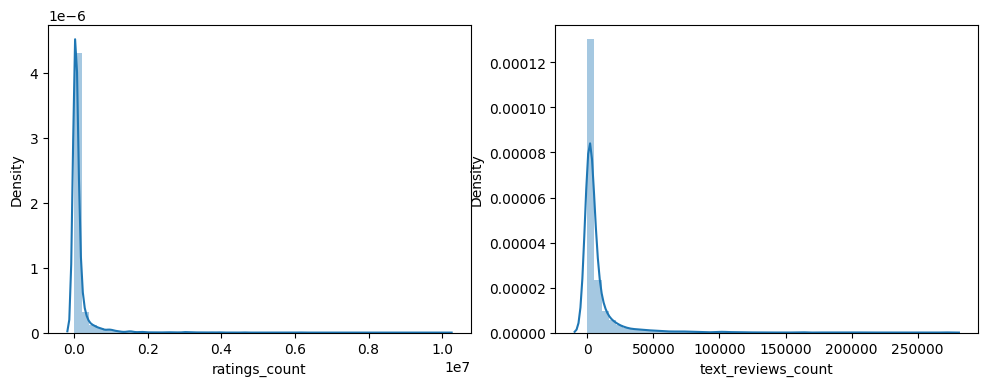

In [ ]:
# Xem phân phối dữ liệu
fig,ax=plt.subplots(1,2, figsize=(12,4))
sns.distplot(df_rating_review["ratings_count"],ax=ax[0])
sns.distplot(df_rating_review["text_reviews_count"],ax=ax[1])

In [ ]:
# Hàm giúp kiểm tra xem áp dụng phương pháp nào thì ra đồ thị chuẩn
# Chọn phương pháp biến đổi dữ liệu mà có giá trị skewness gần 0 nhất.
from scipy import stats
def analyze_skewness(x):
    fig, ax = plt.subplots(2, 2, figsize=(5,5))
    sns.distplot(df_rating_review[x], ax=ax[0,0])
    sns.distplot(np.log(df_rating_review[x]), ax=ax[0,1])
    sns.distplot(np.sqrt(df_rating_review[x]), ax=ax[1,0])
    sns.distplot(stats.boxcox(df_rating_review[x])[0], ax=ax[1,1])
    plt.tight_layout()
    plt.show()

    print(df_rating_review[x].skew().round(2))
    print(np.log(df_rating_review[x]).skew().round(2)) # log
    print(np.sqrt(df_rating_review[x]).skew().round(2)) # square
    print(pd.Series(stats.boxcox(df_rating_review[x])[0]).skew().round(2)) #boxcox


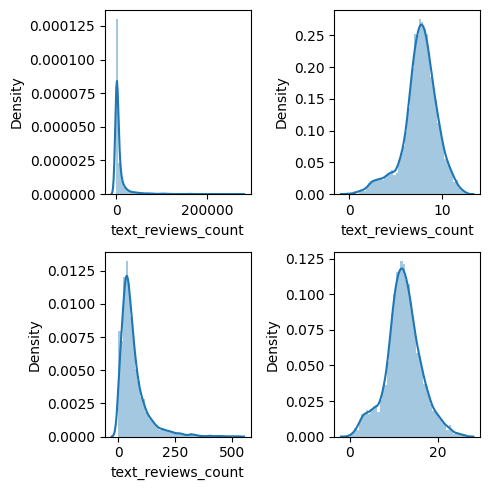

6.35
-0.73
2.59
0.03


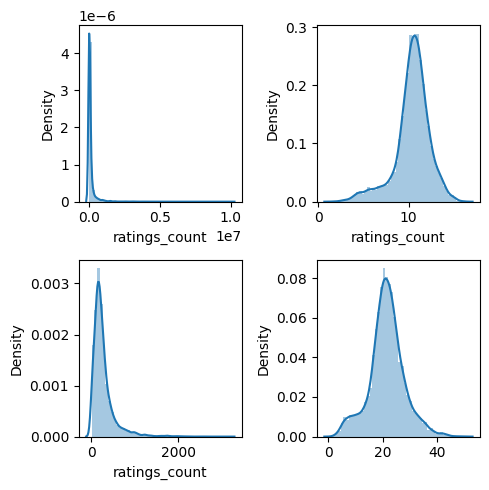

9.88
-0.96
3.2
0.06


In [ ]:
analyze_skewness("text_reviews_count")
analyze_skewness("ratings_count")

In [ ]:
df_rating_review_t=pd.DataFrame()
df_rating_review_t['ratings_count']=stats.boxcox(df_rating_review['ratings_count'])[0]
df_rating_review_t['text_reviews_count']=stats.boxcox(df_rating_review['text_reviews_count'])[0]
df_rating_review_t.head()

,ratings_count,text_reviews_count
0,48.862950,25.253684
1,42.716279,21.017757
2,44.171131,22.981688
3,46.510831,23.048516
4,41.019581,23.777247


In [ ]:
# Scale dữ liệu
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_rating_review_t)
df_rating_review_t=scaler.transform(df_rating_review_t)

In [ ]:
pd.DataFrame(df_rating_review_t).head()

,0,1
0,4.227063,3.222107
1,3.275306,2.178525
2,3.500577,2.662368
3,3.862858,2.678832
4,3.012588,2.858365


**Phân cụm bằng Kmeans**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Kmeans
k = 4 # Số cụm mong muốn
kmeans = KMeans(n_clusters=k,random_state=42)
kmeans.fit(df_rating_review_t)

# Thêm cột 'cluster' vào DataFrame để lưu kết quả phân loại
df_rating_review['cluster'] = kmeans.labels_

# Tính silhouette_score
score = silhouette_score(df_rating_review_t, kmeans.labels_)
print(f"score: {score}")
df_rating_review.head(10)

score: 0.46945723394829536


,bookId,ratings_count,text_reviews_count,cluster
0,2767052,8680309.0,218628.0,0
1,2,3388465.0,63869.0,0
2,1885,4275460.0,115275.0,0
3,2657,6132618.0,117540.0,0
4,19063,2561719.0,144952.0,0
5,41865,6586314.0,130402.0,0
6,170448,3891072.0,96535.0,0
7,30,133755.0,2271.0,1
8,11127,651626.0,12565.0,0
9,11870085,5145819.0,178964.0,0


In [ ]:
df_rating_review.groupby('cluster').agg({
    'ratings_count':'mean',
    'text_reviews_count':'mean'
}).round(2)

,ratings_count,text_reviews_count
cluster,,
0,808999.22,47367.57
1,103697.00,6904.62
2,1543.85,100.98
3,24301.86,1406.08


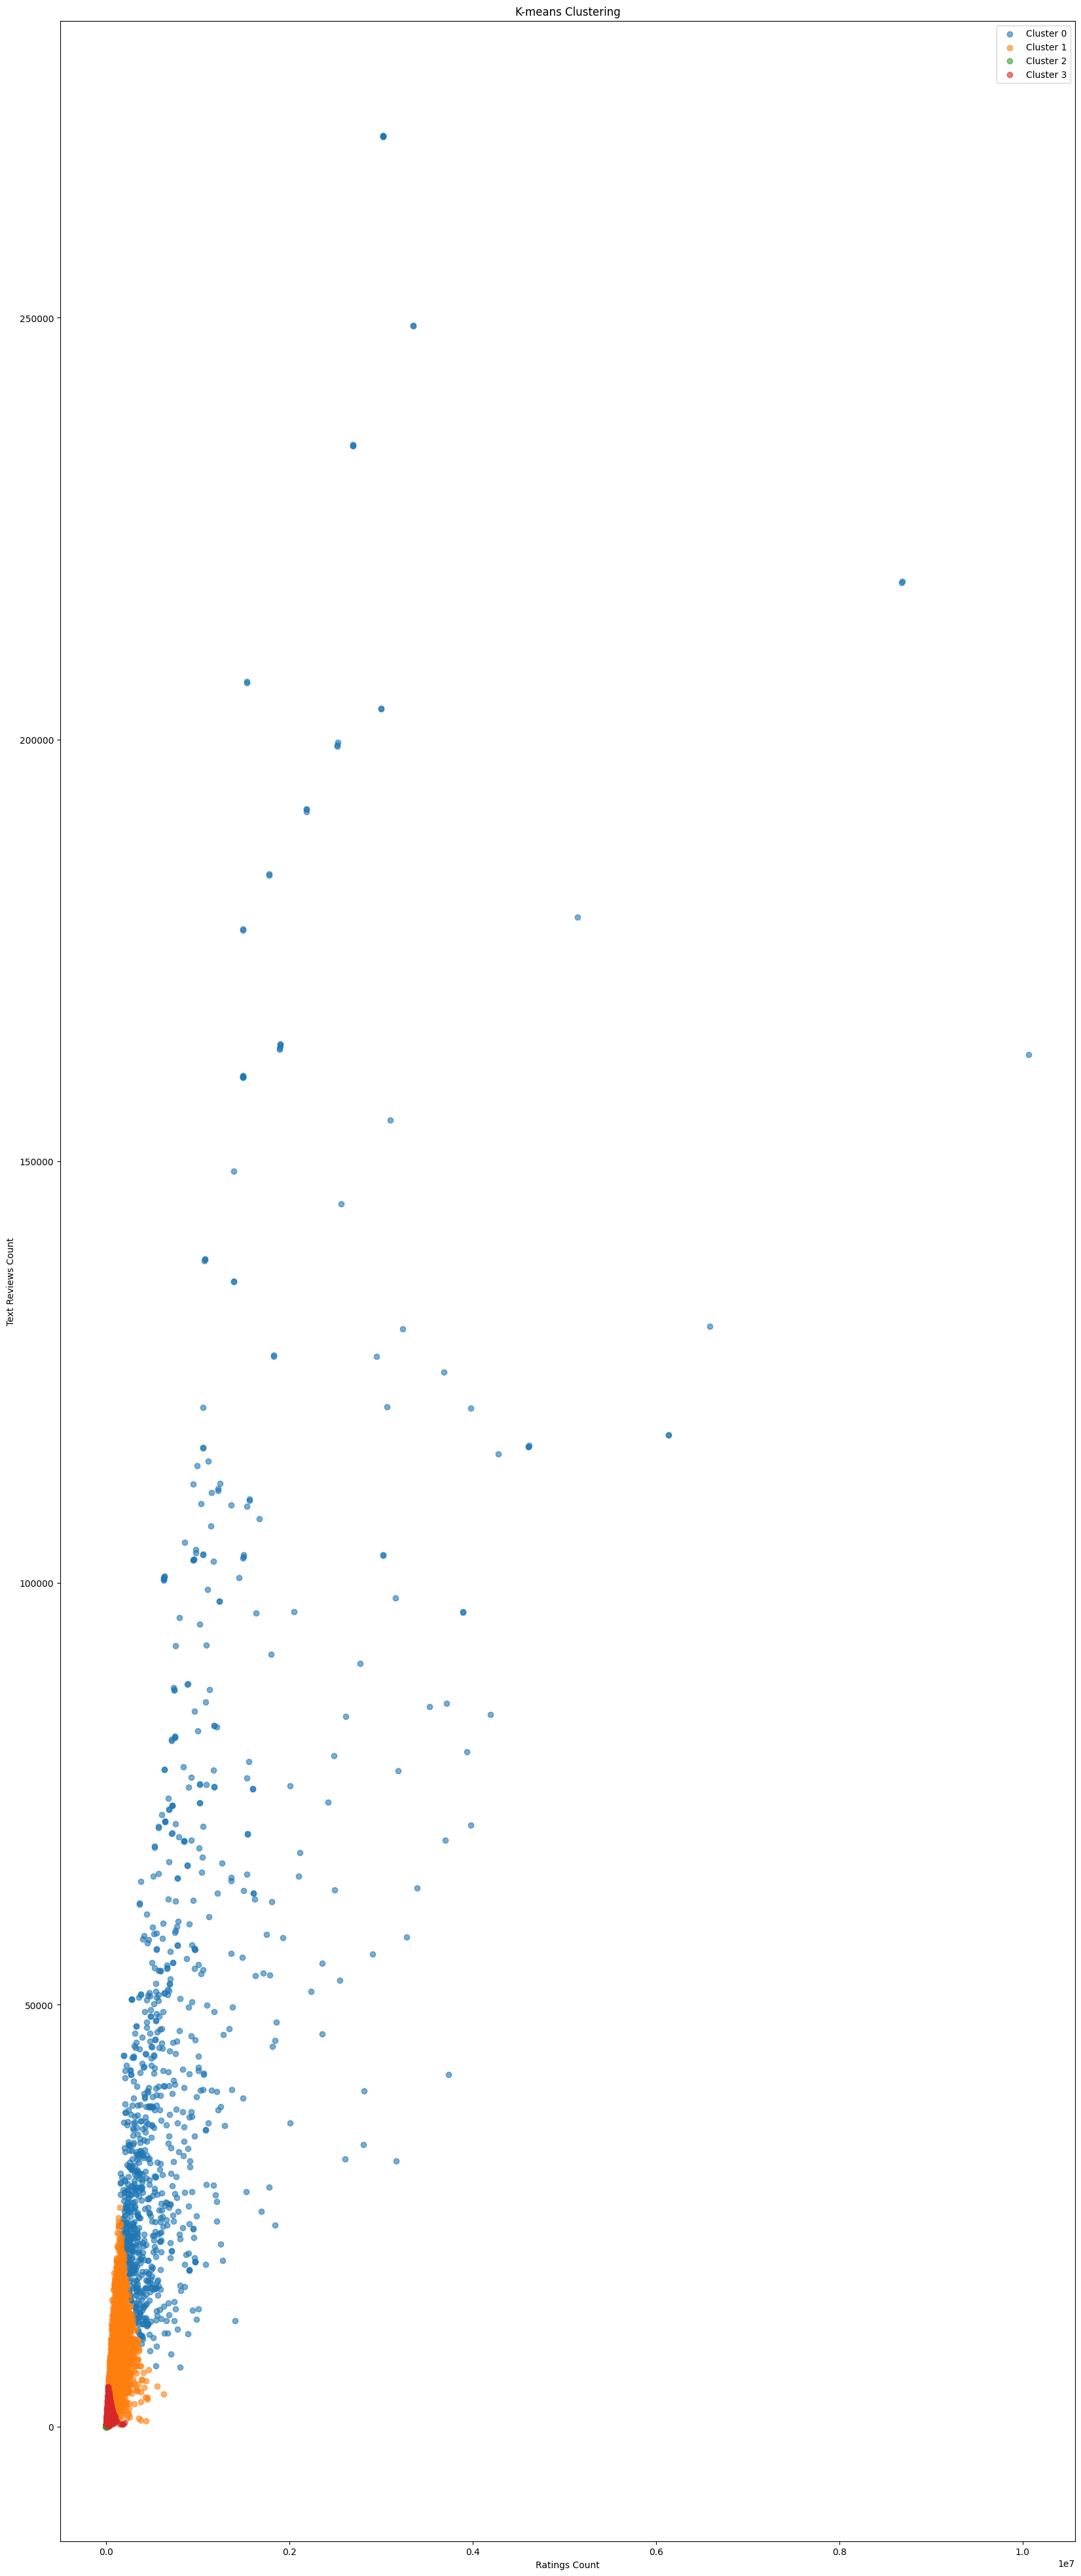

In [ ]:
# Tạo một biểu đồ scatter plot để hiển thị phân cụm
plt.figure(figsize=(20,50))
for cluster_label in range(k):
    cluster_points = df_rating_review[df_rating_review['cluster'] == cluster_label]
    plt.scatter(cluster_points['ratings_count'], cluster_points['text_reviews_count'], label=f'Cluster {cluster_label}', alpha=0.6)

plt.title('K-means Clustering')
plt.xlabel('Ratings Count')
plt.ylabel('Text Reviews Count')
plt.legend()
plt.show()


In [ ]:
# Tạo một danh sách chứa số lượng sách của từng cụm
cluster_books_count = []

# Duyệt qua từng cụm
for cluster_label in range(k):
    # Lấy ra danh sách các quyển sách thuộc cùng một cụm
    books_in_cluster = df_rating_review[df_rating_review['cluster'] == cluster_label]
    # Đếm số lượng sách trong cụm
    num_books_in_cluster = len(books_in_cluster)
    cluster_books_count.append((cluster_label, num_books_in_cluster))

# In ra thông tin số lượng sách của từng cụm
print("Số lượng sách của từng cụm:")
totalBook=0
for cluster_label, num_books in cluster_books_count:
    totalBook+=num_books
    print(f"Cụm {cluster_label}: {num_books} sách")

print(f"totalBook: {totalBook}")


Số lượng sách của từng cụm:
Cụm 0: 976 sách
Cụm 1: 3236 sách
Cụm 2: 1061 sách
Cụm 3: 3789 sách
totalBook: 9062


In [ ]:
# Gộp hai DataFrame theo cột 'bookId'
booksClusterd = pd.merge(books, df_rating_review, on='bookId')
# Bỏ đi các trường không cần thiết
booksClusterd.drop(['ratings_count_y', 'text_reviews_count_y'], axis=1, inplace=True)
booksClusterd.rename(columns={'ratings_count_x':'ratings_count','text_reviews_count_x':'text_reviews_count'},inplace=True)
booksClusterd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9062 entries, 0 to 9061
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookId              9062 non-null   int64  
 1   title               9062 non-null   object 
 2   link                9062 non-null   object 
 3   authors             9062 non-null   object 
 4   genres              9062 non-null   object 
 5   average_rating      9062 non-null   float64
 6   language            9062 non-null   object 
 7   num_pages           9062 non-null   float64
 8   ratings_count       9062 non-null   float64
 9   text_reviews_count  9062 non-null   float64
 10  publication_date    9062 non-null   object 
 11  publisher           9062 non-null   object 
 12  cluster             9062 non-null   int32  
dtypes: float64(4), int32(1), int64(1), object(7)
memory usage: 885.1+ KB


In [ ]:
# Tên của quyển sách bạn muốn tìm
title = "Stepping Heavenward"
# bookId=2767052

# Lấy ra dòng chứa thông tin của quyển sách cụ thể
book_row = booksClusterd.loc[booksClusterd['title'] == title]
print(book_row)
# book_row = booksClusterd.loc[booksClusterd['bookId'] == bookId]

if not book_row.empty:
    # Lấy ra cụm của quyển sách
    book_cluster = book_row['cluster'].iloc[0]

    # Lấy ra danh sách các quyển sách thuộc cùng một cụm
    books_in_cluster = booksClusterd.loc[booksClusterd['cluster'] == book_cluster]
    print(len(books_in_cluster))

    # In ra thông tin của cụm và danh sách các quyển sách trong cụm đó
    print(f"Quyển sách '{title}' đang ở cụm {book_cluster}:")
    print(books_in_cluster[['bookId','title','average_rating','ratings_count','text_reviews_count']])
else:
    print(f"Không tìm thấy thông tin cho quyển sách '{title}'.")


      bookId                title  \
7075  722737  Stepping Heavenward   

                                                   link        authors  \
7075  https://www.goodreads.com/book/show/722737.Ste...  Sara Douglass   

                                                 genres  average_rating  \
7075  Christian, Fiction, Christian Fiction, Classic...            4.25   

     language  num_pages  ratings_count  text_reviews_count publication_date  \
7075  English      352.0         8168.0               592.0       01-07-1998   

          publisher  cluster  
7075  Barbour Books        3  
3789
Quyển sách 'Stepping Heavenward' đang ở cụm 3:
        bookId                                            title  \
154       1423                The Compleat Works of Wllm Shkspr   
225       1375                          The Iliad / The Odyssey   
235     514811                             The Secret Magdalene   
265      24812                   The Complete Calvin and Hobbes   
288    2184798 

In [ ]:
# Lấy ra một quyển sách cụ thể thông qua một cụm đã biết
# Chọn bookId của quyển sách bạn muốn lấy ra từ danh sách đã in ra
desired_book_id = 5907

# Lọc ra thông tin của quyển sách cụ thể dựa trên bookId
specific_book = booksClusterd.loc[booksClusterd['bookId'] == desired_book_id]

if not specific_book.empty:
    # In ra thông tin của quyển sách cụ thể
    print("Thông tin của quyển sách cụ thể:")
    print(specific_book[['bookId','title','average_rating','ratings_count','text_reviews_count','cluster']])
else:
    print(f"Không tìm thấy thông tin cho quyển sách có bookId '{desired_book_id}' trong cụm.")



Thông tin của quyển sách cụ thể:
     bookId                                   title  average_rating  \
112    5907  The Hobbit (The Lord of the Rings, #0)            4.29   

     ratings_count  text_reviews_count  cluster  
112      3980702.0             71337.0        0  


**Vectorization và Tính độ tương đồng của từng cụm bằng cosine simalarity**

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix,hstack

from sklearn.metrics.pairwise import cosine_similarity,linear_kernel
def vectorize_data(data):
    # Thực hiện vectorization cho các trường 'title', 'authors', 'genres', 'average_rating'
    # Vectorization code here
    tfidf_vectorizer = TfidfVectorizer(stop_words='english',ngram_range=(1, 2))
    title_vector = tfidf_vectorizer.fit_transform(data['title'])
    authors_vector = tfidf_vectorizer.fit_transform(data['authors'])
    genres_vector = tfidf_vectorizer.fit_transform(data['genres'])
    # Chuẩn hóa average rating
    # scaler = StandardScaler()
    # avg_rating_scaled = scaler.fit_transform(data['average_rating'].values.reshape(-1, 1))
    # return [title_vector,authors_vector,genres_vector,avg_rating_scaled]
    return [title_vector,authors_vector,genres_vector,data['average_rating'].values.reshape(-1, 1)]

def combine_features(list_vectorized_data):
  vectorized_data_title = list_vectorized_data[0]
  vectorized_data_authors = list_vectorized_data[1]
  vectorized_data_genres = list_vectorized_data[2]
  average_rating = list_vectorized_data[3]
  # Kết hợp các vectorized data lại
  features = hstack([vectorized_data_title, vectorized_data_authors,vectorized_data_genres])
  return features

def compute_similarity(data):
    # Tính độ tương đồng dựa trên cosine similarity
    similarity_matrix = cosine_similarity(data)
    return similarity_matrix

# cluster_data = booksClusterd[booksClusterd['cluster'] == 2]
# list_vectorized_data=vectorize_data(cluster_data)
# features=combine_features(list_vectorized_data)
# cosine_sim=compute_similarity(features)
# cosine_sim

cluster_similarity = {}
# Duyệt qua từng cụm
print(k)
for cluster_label in range(0,k):
    print(cluster_label)
    # Lấy dữ liệu của cụm hiện tại
    cluster_data = booksClusterd[booksClusterd['cluster'] == cluster_label]

    # Vectorization cho các trường 'title', 'authors', 'genres', 'average_rating'
    list_vectorized_data=vectorize_data(cluster_data)

    features=combine_features(list_vectorized_data)
    # Tính độ tương đồng dựa trên cosine similarity
    similarity_matrix=compute_similarity(features)

    # Lưu kết quả vào cluster_similarity
    cluster_similarity[cluster_label] = similarity_matrix
print(cluster_similarity[0])
print(cluster_similarity[1])
print(cluster_similarity[2])


4
0
1
2
3
[[1.         0.02989464 0.00904731 ... 0.00705831 0.0241623  0.00686738]
 [0.02989464 1.         0.00704255 ... 0.00159651 0.06594397 0.0037679 ]
 [0.00904731 0.00704255 1.         ... 0.02726519 0.0080412  0.06985092]
 ...
 [0.00705831 0.00159651 0.02726519 ... 1.         0.00664447 0.02499689]
 [0.0241623  0.06594397 0.0080412  ... 0.00664447 1.         0.00407164]
 [0.00686738 0.0037679  0.06985092 ... 0.02499689 0.00407164 1.        ]]
[[1.         0.0088767  0.00886249 ... 0.00441915 0.00362322 0.        ]
 [0.0088767  1.         0.08801179 ... 0.00211511 0.08128609 0.        ]
 [0.00886249 0.08801179 1.         ... 0.00211173 0.01677708 0.        ]
 ...
 [0.00441915 0.00211511 0.00211173 ... 1.         0.00282594 0.        ]
 [0.00362322 0.08128609 0.01677708 ... 0.00282594 1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]
[[1.         0.         0.         ... 0.         0.09375176 0.00591985]
 [0.         1.         0.044

**Code để lấy ra được danh sách các cuốn sách được đề xuất**

In [ ]:
def find_similar_books_in_cluster(cluster_similarity, title, threshold=0.5, top_n=30):
    book_row = booksClusterd.loc[booksClusterd['title'] == title]
    print(book_row)
    cluster_label = book_row['cluster'].iloc[0]
    print("Cluster: ",cluster_label)
    # Lấy ma trận tương đồng của cụm
    similarity_matrix = cluster_similarity[cluster_label]
    cluster_data = booksClusterd.loc[booksClusterd['cluster'] == cluster_label].reset_index(drop=True)
    # Tìm vị trí của sách trong dữ liệu cụm
    book_index = cluster_data[cluster_data['title'] == title_query].index[0]
    # print(len(cluster_data))
    # Lấy vector tương ứng với sách truy vấn
    # query_vector = similarity_matrix[book_index]
    distances = sorted(list(enumerate(similarity_matrix[book_index])),reverse=True,key = lambda x: x[1])
    # print(distances)

    # df book recommend
    booksRecommend = []
    booksRecommend_df = pd.DataFrame(columns=cluster_data.columns)
    for i,score in distances[1:30]:
        booksRecommend.append(cluster_data.iloc[[i]])
        print(score," ",cluster_data.iloc[i].bookId," ",cluster_data.iloc[i].title," ",cluster_data.iloc[i].genres," ",cluster_data.iloc[i].average_rating," ",cluster_data.iloc[i].authors," ",cluster_data.iloc[i].ratings_count," ",cluster_data.iloc[i].text_reviews_count)
    booksRecommend_df = pd.concat(booksRecommend, ignore_index=True)
    return booksRecommend_df
# Lấy danh sách 30 cuốn sách tương đồng trong cụm cho một tiêu đề nhập vào
# Sách thuộc cụm 0
# title_query = "The Fellowship of the Ring (The Lord of the Rings, #1)"
title_query = "The Hunger Games (The Hunger Games, #1)"

# Sách thuộc cụm 1
# title_query = "The Female of the Species"

# Sách thuộc cụm 2
# title_query = "Africa's Child (Dancing Soul Trilogy, #1)"

# Sách thuộc cụm 3
# title_query = "The Days Are Just Packed (Calvin and Hobbes, #8)"
booksRecommend_df = find_similar_books_in_cluster(cluster_similarity ,title_query)
# print("\nBooks Recommend df: ")
# print(booksRecommend_df)


        bookId                                    title  \
0      2767052  The Hunger Games (The Hunger Games, #1)   
8922  12885649  The Hunger Games (The Hunger Games, #1)   

                                                   link          authors  \
0     https://www.goodreads.com/book/show/2767052-th...  Suzanne Collins   
8922  https://www.goodreads.com/book/show/12885649-t...  Suzanne Collins   

                                                 genres  average_rating  \
0     Young Adult, Fiction, Fantasy, Science Fiction...            4.34   
8922  Young Adult, Fiction, Fantasy, Science Fiction...            4.34   

     language  num_pages  ratings_count  text_reviews_count publication_date  \
0     English      374.0      8680309.0            218628.0       14-10-2008   
8922  English      458.0      8685410.0            218733.0       01-12-2011   

                        publisher  cluster  
0                Scholastic Press        0  
8922  Scholastic Children's Books   

**Evaluate Clustering**

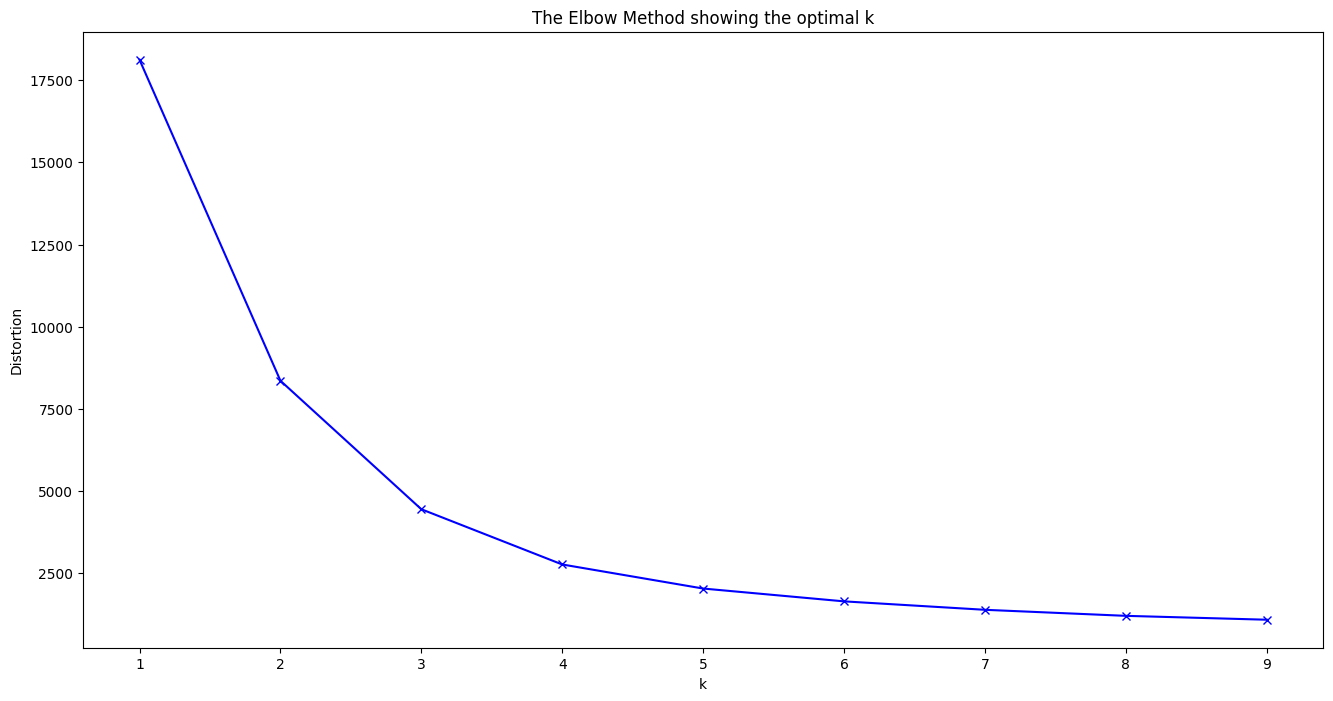

In [ ]:
# Chuyển unique_genres thành một mảng NumPy chứa các chuỗi
# X = np.array(list(unique_genres))

distortions = []
K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(df_rating_review_t)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16, 8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


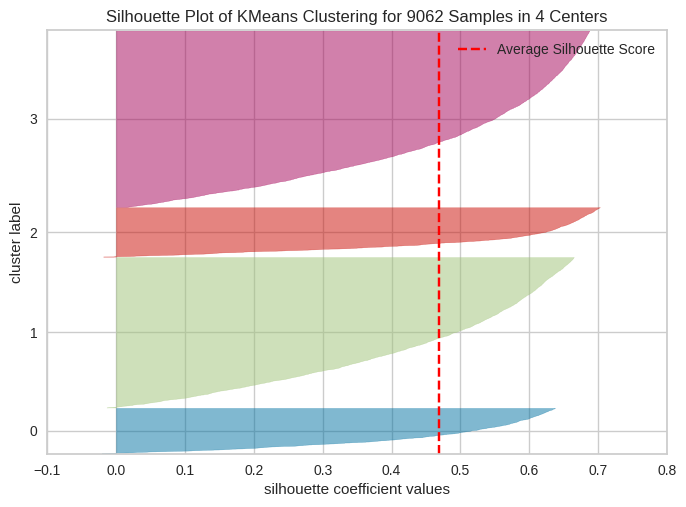

Silhouette Score của thuật toán KMeans là: 0.46945723394829536


In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt

# Tính giá trị Silhouette Score
silhouette_avg = silhouette_score(df_rating_review_t, kmeans.labels_)

# Hiển thị biểu đồ Silhouette
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(df_rating_review_t)
visualizer.show()

# In ra giá trị Silhouette Score
print(f"Silhouette Score của thuật toán KMeans là: {silhouette_avg}")


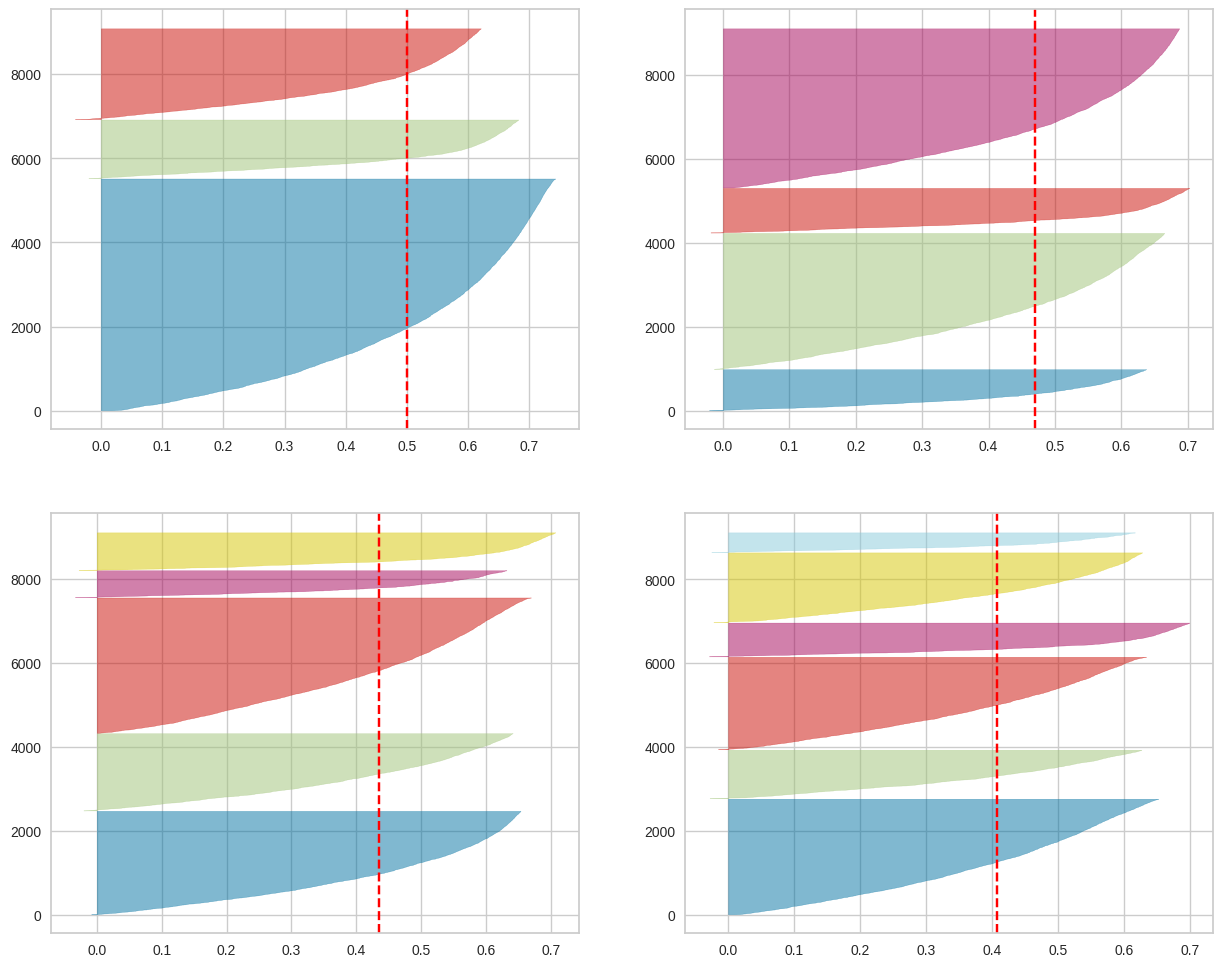

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,12))
for i, kCl in enumerate([3,4,5,6]):
    km = KMeans(n_clusters=kCl, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q][mod])  # Sửa chỉ số của ax
    visualizer.fit(df_rating_review_t)

plt.show()
